In [18]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 128
num_classes = 10
epochs = 12

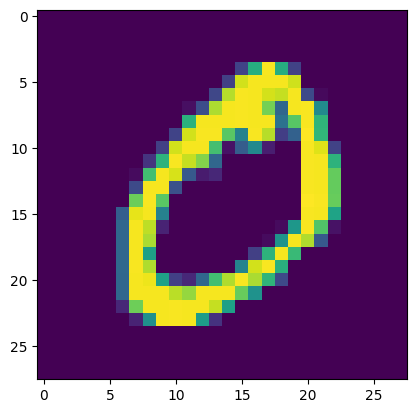

In [41]:
#input image dimension
img_rows, img_cols = 28, 28
#the data split between train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[1])

In [3]:


x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows * img_cols, 1)



x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('Each Sample Shape:', x_train[0].shape)
print("X train Shape: ", x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Each Sample Shape: (28, 28, 1)
X train Shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
#Create CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(728, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 728)               6709976   
                                                        

In [7]:
# loss and optimizer
optimizer = keras.optimizers.Adam()
loss = keras.losses.categorical_crossentropy

In [8]:
#Complie the model
model.compile(loss = loss, optimizer = optimizer, metrics = ['accuracy'])

In [10]:
#train the model
model.fit(
    x_train, y_train,
    batch_size = batch_size,
    epochs = epochs,
    verbose = 1,
    validation_data = (x_test, y_test)
)
model.save("/home/roni/Project/Convulational Neural Network/model_cnn.h5")

Epoch 1/12


2023-11-02 15:22:25.509785: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 135s 287ms/step - loss: 0.0131 - accuracy: 0.9954 - val_loss: 0.0257 - val_accuracy: 0.9933
Epoch 2/12
469/469 [==============================] - 135s 287ms/step - loss: 0.0135 - accuracy: 0.9954 - val_loss: 0.0230 - val_accuracy: 0.9931
Epoch 3/12
469/469 [==============================] - 134s 287ms/step - loss: 0.0110 - accuracy: 0.9964 - val_loss: 0.0280 - val_accuracy: 0.9921
Epoch 4/12
469/469 [==============================] - 134s 286ms/step - loss: 0.0111 - accuracy: 0.9961 - val_loss: 0.0268 - val_accuracy: 0.9935
Epoch 5/12
469/469 [==============================] - 134s 286ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0291 - val_accuracy: 0.9928
Epoch 6/12
469/469 [==============================] - 134s 286ms/step - loss: 0.0088 - accuracy: 0.9968 - val_loss: 0.0283 - val_accuracy: 0.9929
Epoch 7/12
469/469 [==============================] - 136s 290ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0281 - val_accura

In [11]:
# shape = batch_size, height, weight, channel

In [35]:
test_image = x_test[0].reshape(1, 28, 28, 1)

In [36]:
pred = model.predict(test_image)

1/1 [==============================] - 0s 34ms/step


In [37]:
output = np.argmax(pred, axis = 1)

Actual output:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Predicted output:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


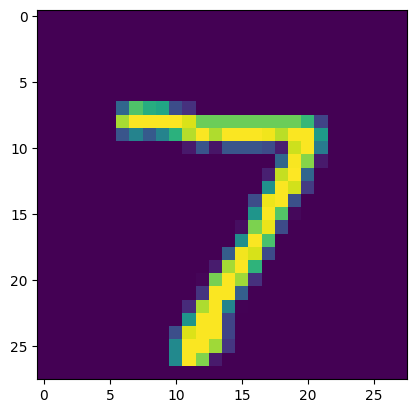

In [39]:
print("Actual output: ", y_test[0])
print("Predicted output: ", y_test[0])
plt.imshow(x_test[0])